# Feature Extraction (Ozellik Cikarimi)
Ham veriden degisken (feature) uretmek, cikarmak.
Yapisal verilerden degiskenler uretmek, yapisal olmayan verilerden degiskenler uretmek.

Assagida gorunen gorselde Veri setimizin ilk halinde Timestamp degiskeni var.
Ancak boyle bir degiskeni makine ogrenmesi uygulamamizda kullanamiyoruz bu sebeple o degiskenden 5 farkli degisken turetiyoruz.

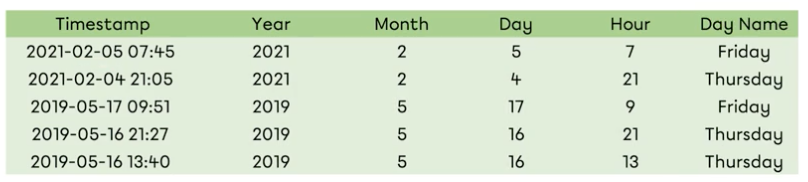

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
pd.set_option('display.max_columns', None)

In [2]:
def load():
    df = pd.read_csv("/Users/huseyinefkanalp/Desktop/DataScience/Miuul/FeatureEngineering/datasets/titanic.csv")
    return df

## Binary Features: Flag, Bool, True-False

In [19]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#Cabin degiskenleri icerisinde nan olanlara 1 olmayanlara 0 yazdirma
df['NEW_CABIN_BOOL'] = df['Cabin'].notnull().astype('int')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
#Gorundugu uzre daha onceden bizim icin cop sayilan cabin degiskeni artik cok degerli bir degiskene donustu
df.groupby('NEW_CABIN_BOOL')['Survived'].mean()

NEW_CABIN_BOOL
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [22]:
#bir oran testi yapalim bakalim cidden istatistiksel olarak fark var mi?
from statsmodels.stats.proportion import proportions_ztest

In [23]:
test_stat, pvalue = proportions_ztest(count= [df.loc[df['NEW_CABIN_BOOL'] == 1, 'Survived'].sum(),
                                                df.loc[df['NEW_CABIN_BOOL'] == 0, 'Survived'].sum()],
                                       
                                       	nobs=[df.loc[df['NEW_CABIN_BOOL'] == 1, 'Survived'].shape[0],
                                              df.loc[df['NEW_CABIN_BOOL'] == 0, 'Survived'].shape[0]])

In [24]:
# Eger pvalue degeri 0.05 den dusuk ise hipotez reddedilir.
# Aralarinda istatistiksel olarak anlamli bir faklilik vardir.
print('Test Stat = %.4f, p-value = %.4f'% (test_stat, pvalue))

Test Stat = 9.4597, p-value = 0.0000


In [25]:
df.loc[((df['SibSp'] + df['Parch']) > 0), 'NEW_IS_ALONE']= 'NO'
df.loc[((df['SibSp'] + df['Parch']) == 0), 'NEW_IS_ALONE']= 'YES'

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL,NEW_IS_ALONE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,NO
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,NO
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,YES
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,NO
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,YES


In [27]:
df.groupby('NEW_IS_ALONE')['Survived'].mean()

NEW_IS_ALONE
NO     0.505650
YES    0.303538
Name: Survived, dtype: float64